In [14]:
import torch
from PIL import Image,ImageDraw
import numpy as np
from CRAFT import CRAFTModel, draw_boxes, draw_polygons, boxes_area, polygons_area
import matplotlib.pyplot as plt
model = CRAFTModel('cuda', use_refiner=True, fp16=True)

TypeError: string indices must be integers

In [ ]:
!mkdir test
!wget -P test https://bcp.cdnchinhphu.vn/334894974524682240/2022/7/1/2905720597467276433088515989264583986449867n-16566418814711622162072.jpg

A subdirectory or file test already exists.
--2025-03-02 17:48:55--  https://bcp.cdnchinhphu.vn/334894974524682240/2022/7/1/2905720597467276433088515989264583986449867n-16566418814711622162072.jpg
Resolving bcp.cdnchinhphu.vn (bcp.cdnchinhphu.vn)... 42.112.37.34
Connecting to bcp.cdnchinhphu.vn (bcp.cdnchinhphu.vn)|42.112.37.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128688 (126K) [image/jpeg]
Saving to: 'test/2905720597467276433088515989264583986449867n-16566418814711622162072.jpg.1'

     0K .......... .......... .......... .......... .......... 39% 4.44M 0s
    50K .......... .......... .......... .......... .......... 79% 4.20M 0s
   100K .......... .......... .....                           100% 8.04M=0.03s

2025-03-02 17:48:56 (4.77 MB/s) - 'test/2905720597467276433088515989264583986449867n-16566418814711622162072.jpg.1' saved [128688/128688]



## Predict polygons

In [ ]:
img = Image.open('test/test_img.jpg')
boxes = model.get_boxes(img)
draw = ImageDraw.Draw(img)
for box in boxes:
  draw.rectangle((box[0][0], box[0][1],box[2][0], box[2][1]), outline='red')
img.show()

NameError: name 'Image' is not defined

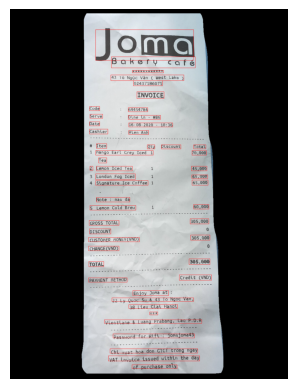

In [ ]:
import cv2
img = cv2.imread('test/test_img.jpg')
for box in boxes:
  cv2.rectangle(img, (box[0][0], box[0][1]), (box[2][0], box[2][1]), color = (255, 0, 0))

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
boxes

[[[315, 76], [676, 76], [676, 189], [315, 189]],
 [[373, 176], [683, 184], [682, 217], [372, 209]],
 [[450, 226], [565, 223], [565, 235], [450, 238]],
 [[371, 243], [640, 243], [640, 264], [371, 264]],
 [[454, 264], [561, 264], [561, 283], [454, 283]],
 [[467, 305], [567, 305], [567, 330], [467, 330]],
 [[292, 360], [330, 360], [330, 375], [292, 375]],
 [[435, 364], [507, 364], [507, 379], [435, 379]],
 [[294, 388], [341, 388], [341, 403], [294, 403]],
 [[435, 392], [554, 392], [554, 407], [435, 407]],
 [[292, 416], [330, 416], [330, 431], [292, 431]],
 [[437, 420], [599, 420], [599, 435], [437, 435]],
 [[292, 443], [360, 443], [360, 461], [292, 461]],
 [[437, 448], [510, 448], [510, 463], [437, 463]],
 [[318, 497], [356, 497], [356, 514], [318, 514]],
 [[505, 501], [533, 501], [533, 516], [505, 516]],
 [[557, 501], [629, 501], [629, 516], [557, 516]],
 [[676, 501], [721, 501], [721, 516], [676, 516]],
 [[315, 522], [527, 522], [527, 539], [315, 539]],
 [[670, 522], [723, 522], [723, 5

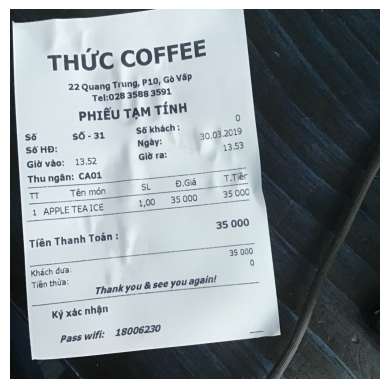

In [ ]:
img = cv2.imread('test/mcocr_val_145114ixmyt.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
boxes = model.get_boxes(img)
print(boxes)
print(np.array(boxes).shape)

[[[100, 122], [542, 80], [548, 144], [106, 186]], [[158, 205], [505, 175], [508, 208], [161, 238]], [[225, 236], [447, 215], [449, 240], [227, 261]], [[186, 277], [489, 250], [493, 292], [190, 319]], [[347, 324], [471, 314], [473, 340], [349, 350]], [[523, 343], [642, 325], [646, 351], [527, 368]], [[172, 337], [264, 337], [264, 364], [172, 364]], [[41, 342], [76, 342], [76, 366], [41, 366]], [[353, 356], [422, 356], [422, 385], [353, 385]], [[586, 372], [648, 364], [651, 389], [589, 397]], [[42, 378], [133, 374], [134, 400], [43, 403]], [[353, 397], [436, 391], [437, 416], [355, 421]], [[178, 411], [241, 408], [242, 431], [179, 434]], [[46, 416], [153, 416], [153, 441], [46, 441]], [[46, 460], [255, 446], [257, 474], [48, 489]], [[590, 449], [660, 449], [660, 483], [590, 483]], [[455, 470], [516, 464], [519, 490], [458, 497]], [[363, 481], [392, 481], [392, 504], [363, 504]], [[165, 497], [266, 491], [268, 516], [166, 522]], [[590, 496], [665, 496], [665, 524], [590, 524]], [[443, 518

In [ ]:
boxes_ratio = []
direct_rotate = []
for box in boxes:
  x1, y1, x2, y2 = box[0][0], box[0][1], box[1][0], box[1][1]
  box_ratio = abs(y1 - y2) / abs(x1 - x2)
  direct_rotate.append(y1 - y2)
  boxes_ratio.append(box_ratio)

mean_ratio = np.mean(boxes_ratio)
mean_direct_rotate = np.mean(direct_rotate)
print(mean_ratio)
print(mean_direct_rotate)

0.0703685081296709
11.6875


In [ ]:
angle = np.arctan(mean_ratio)
print(angle)

0.07025270344962022


In [ ]:
if mean_direct_rotate >= 0:
  angle_degree = -np.degrees(angle)
  print(angle_degree)
else:
  angle_degree = -np.degrees(angle)
  print(angle_degree)

-4.025183407047398


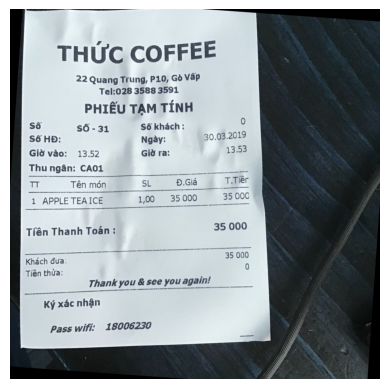

In [ ]:
w,h  = img.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), angle_degree, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(rotated)
plt.axis('off')
plt.show()

In [ ]:
boxes = model.get_boxes(rotated)
print(boxes)

[[[130, 93], [572, 84], [573, 147], [131, 157]], [[182, 180], [527, 175], [528, 209], [182, 214]], [[245, 217], [468, 212], [469, 236], [246, 241]], [[204, 255], [508, 249], [509, 290], [205, 296]], [[52, 312], [89, 312], [89, 334], [52, 334]], [[361, 313], [484, 313], [484, 337], [361, 337]], [[184, 314], [275, 316], [275, 344], [183, 342]], [[534, 344], [655, 334], [657, 359], [536, 369]], [[53, 346], [143, 349], [142, 374], [52, 371]], [[362, 350], [433, 347], [434, 375], [363, 379]], [[596, 379], [657, 375], [659, 399], [598, 403]], [[52, 386], [249, 389], [249, 413], [52, 411]], [[363, 387], [444, 387], [444, 411], [363, 411]], [[52, 428], [259, 428], [259, 457], [52, 457]], [[593, 459], [664, 459], [664, 494], [593, 494]], [[458, 467], [519, 465], [520, 491], [459, 493]], [[364, 472], [392, 472], [392, 494], [364, 494]], [[168, 473], [267, 473], [267, 499], [168, 499]], [[587, 505], [665, 505], [665, 539], [587, 539]], [[444, 512], [520, 512], [520, 536], [444, 536]], [[355, 515]

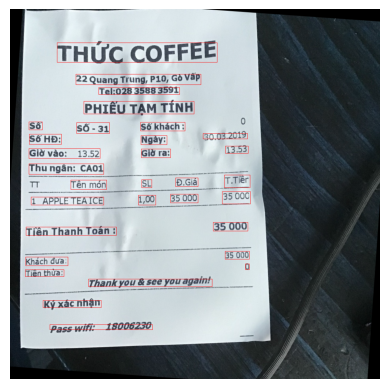

In [ ]:
for box in boxes:
  cv2.rectangle(rotated, (box[0][0], box[0][1]), (box[2][0], box[2][1]), color = (255, 0, 0))

plt.imshow(rotated)
plt.axis('off')
plt.show()

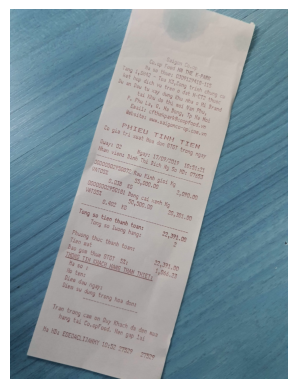

In [ ]:
img = cv2.imread('test/mcocr_val_145114rqxas.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
boxes = model.get_boxes(img)
print(boxes)
print(np.array(boxes).shape)

[[[577, 173], [696, 208], [688, 233], [569, 199]], [[513, 181], [745, 244], [738, 269], [506, 206]], [[414, 204], [524, 234], [517, 260], [407, 230]], [[497, 202], [748, 272], [742, 296], [490, 226]], [[415, 230], [782, 333], [775, 357], [408, 253]], [[546, 241], [798, 315], [790, 341], [538, 267]], [[399, 252], [785, 362], [778, 387], [392, 277]], [[469, 297], [731, 374], [724, 398], [462, 320]], [[431, 314], [742, 403], [735, 429], [423, 340]], [[443, 344], [506, 362], [500, 384], [436, 366]], [[426, 366], [729, 456], [721, 480], [419, 390]], [[511, 362], [726, 425], [718, 450], [503, 388]], [[413, 415], [514, 444], [507, 468], [406, 439]], [[347, 422], [726, 531], [719, 558], [339, 449]], [[531, 449], [610, 471], [604, 494], [524, 473]], [[332, 474], [417, 498], [410, 523], [325, 499]], [[627, 476], [704, 498], [697, 523], [619, 500]], [[323, 500], [717, 610], [709, 637], [316, 527]], [[466, 514], [629, 556], [622, 581], [460, 540]], [[310, 547], [616, 638], [608, 664], [302, 573]],

In [ ]:
boxes_ratio = []
direct_rotate = []
for box in boxes:
  x1, y1, x2, y2 = box[0][0], box[0][1], box[1][0], box[1][1]
  box_ratio = abs(y1 - y2) / abs(x1 - x2)
  direct_rotate.append(y1 - y2)
  boxes_ratio.append(box_ratio)

mean_ratio = np.mean(boxes_ratio)
mean_direct_rotate = np.mean(direct_rotate)
print(mean_ratio)
print(mean_direct_rotate)

0.2577632852395962
-47.431372549019606


In [ ]:
angle = np.arctan(mean_ratio)
print(angle)

0.25227183287364874


In [ ]:
if mean_direct_rotate >= 0:
  angle_degree = -np.degrees(angle)
  print(angle_degree)
else:
  angle_degree = np.degrees(angle)
  print(angle_degree)

14.454111313689731


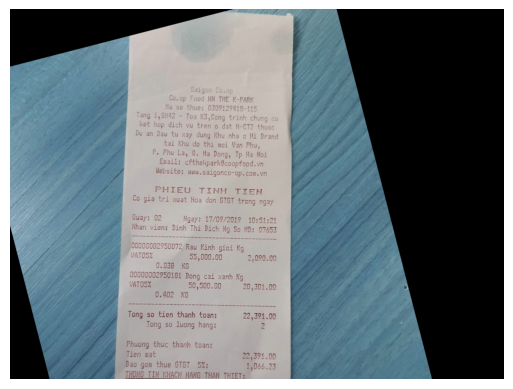

In [ ]:
w,h  = img.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), angle_degree, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(rotated)
plt.axis('off')
plt.show()

[[[497, 210], [619, 214], [618, 239], [496, 235]], [[437, 234], [676, 240], [676, 263], [437, 257]], [[427, 257], [685, 265], [685, 288], [426, 280]], [[347, 280], [745, 292], [744, 318], [347, 306]], [[354, 306], [732, 316], [732, 338], [353, 329]], [[345, 332], [743, 342], [742, 367], [345, 357]], [[424, 356], [694, 366], [693, 390], [424, 381]], [[392, 383], [713, 392], [712, 417], [392, 408]], [[412, 409], [702, 419], [702, 442], [411, 433]], [[399, 434], [713, 448], [712, 471], [398, 458]], [[399, 486], [700, 494], [699, 518], [398, 509]], [[337, 510], [730, 521], [729, 548], [336, 536]], [[335, 565], [420, 567], [420, 590], [334, 588]], [[476, 568], [738, 571], [738, 596], [475, 593]], [[335, 590], [738, 599], [738, 624], [334, 615]], [[333, 638], [649, 651], [648, 677], [332, 664]], [[330, 670], [396, 670], [396, 691], [330, 691]], [[495, 674], [589, 674], [589, 697], [495, 697]], [[654, 678], [738, 674], [739, 699], [655, 703]], [[401, 696], [497, 699], [497, 722], [400, 719]],

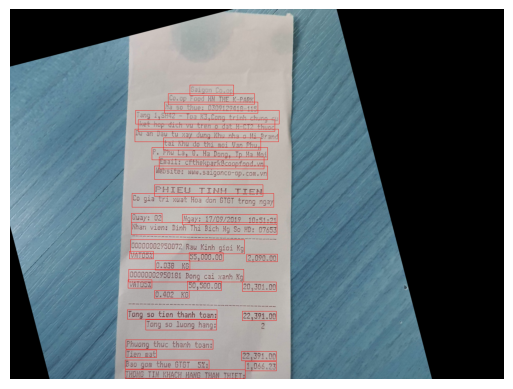

In [ ]:
boxes = model.get_boxes(rotated)
print(boxes)
for box in boxes:
  cv2.rectangle(rotated, (box[0][0], box[0][1]), (box[2][0], box[2][1]), color = (255, 0, 0))
plt.imshow(rotated)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('../../../dataset/mcocr_train_df.csv')
df.head()

,img_id,anno_polygons,anno_texts,anno_labels,anno_num,anno_image_quality
0,mcocr_public_145013ddcph.jpg,"[{'category_id': 15, 'segmentation': [[231.9, ...",MINIMART ANAN|||Chợ Sủi Phú Thị Gia Lâm|||Ngày...,SELLER|||ADDRESS|||TIMESTAMP|||TOTAL_COST|||TO...,5,0.635309
1,mcocr_public_145013fxcgs.jpg,"[{'category_id': 15, 'segmentation': [[311.6, ...",VinCommerce|||VM + QNH Dự án quỹ đất đường sắt...,SELLER|||ADDRESS|||ADDRESS|||ADDRESS|||TIMESTA...,7,0.774317
2,mcocr_public_145013clltn.jpg,"[{'category_id': 15, 'segmentation': [[626.8, ...",SIEU THI BACH HOA TONG HOP|||Bố 5 Cẩm Tây - Cẩ...,SELLER|||ADDRESS|||TOTAL_COST|||TOTAL_COST|||T...,5,0.664084
3,mcocr_public_145013tmibr.jpg,"[{'category_id': 15, 'segmentation': [[715.5, ...",co.op mart|||Co.opMart HAU GIANG|||188 Hau Gia...,SELLER|||SELLER|||ADDRESS|||ADDRESS|||TIMESTAM...,8,0.715504
4,mcocr_public_145013kgypr.jpg,"[{'category_id': 16, 'segmentation': [[200.5, ...","Tổ 7, Khu Minh Tiến A|||VinCommerce|||Ngày bán...",ADDRESS|||SELLER|||TIMESTAMP|||TOTAL_COST|||TO...,5,0.766884


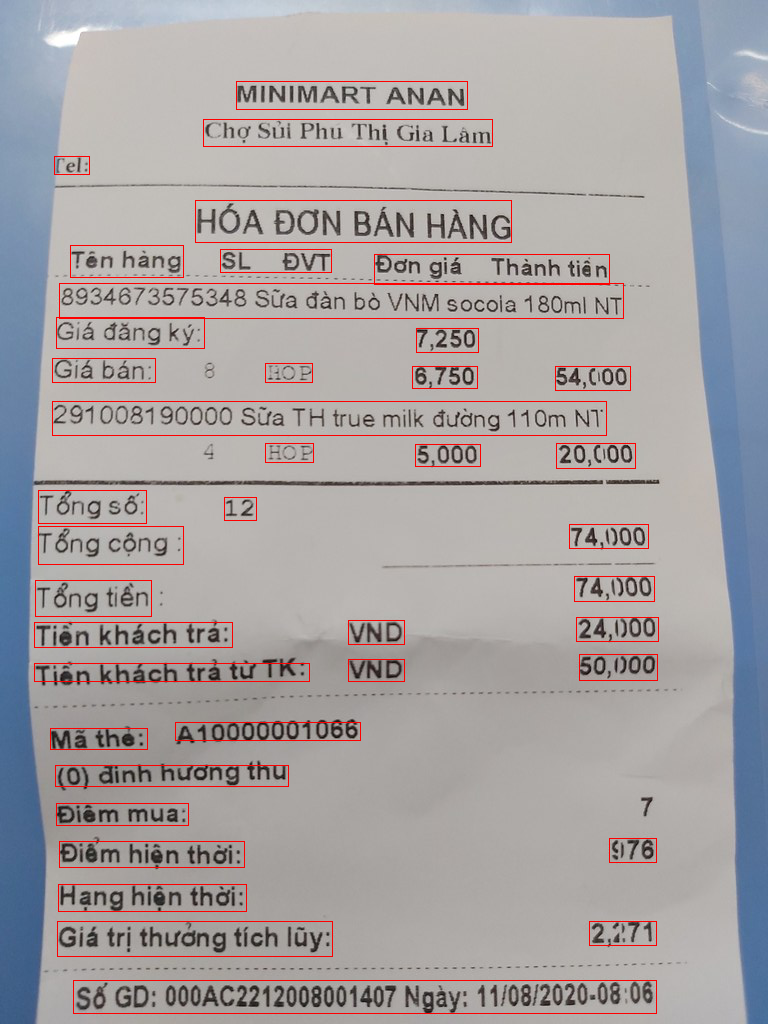

In [ ]:
img = Image.open('../../../dataset/train_images/mcocr_public_145013ddcph.jpg')
boxes = model.get_boxes(img)
draw = ImageDraw.Draw(img)
for box in boxes:
  draw.rectangle((box[0][0], box[0][1],box[2][0], box[2][1]), outline='red')
img.show()